# Wine Quality Prediction 

### Imports fundamental Python libraries: numpy, pandas, matplotlib.pyplot.	

These libraries are the foundation of nearly all data science and machine learning projects in Python:
- pandas: Essential for reading and manipulating data in tabular structures (DataFrames).
- numpy: Provides fast, efficient mathematical operations on arrays (the underlying structure for most ML calculations).
- matplotlib.pyplot: The primary tool for creating visualizations (plots, charts).

In [1]:
# Import core libraries that are foundational for most machine learning workflows.
import numpy as np        # NumPy: Used for fast mathematical manipulation of arrays and matrices, essential for numerical computing
import pandas as pd       # Pandas: Provides high-performance data structures and functions for data wrangling
import matplotlib.pyplot as plt  # Matplotlib: Helps visualize data through static, animated, or interactive plots
# Good practice: Always import necessary libraries in one cell at the start for transparency and debuggability.

### Loading CSV dataset
Loads the winequality-red.csv file into a pandas DataFrame named data. It then displays the first five rows using data.head().

Loads the winequality-red.csv file into a pandas DataFrame named data. It then displays the first five rows using data.head().	This is the first step in data analysis, ensuring the file loads correctly. Checking the head quickly reveals the data's format, column names, and helps spot immediate issues like encoding problems or incorrect delimiters.

In [2]:
# Read the wine quality dataset into a pandas DataFrame.
# CSV loading is the most common way to bring data into Python for analysis and ML.
data = pd.read_csv('winequality-red.csv')
# Display the first few rows to understand the format, spot-immediate errors, and infer basic structure.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Verifying column names is crucial to ensure correct spelling and to understand the exact features available for modeling.
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
# Summary statistics are vital for initial Exploratory Data Analysis (EDA). 
# They help identify the range of values, detect potential outliers (e.g., a max value far outside the 75th percentile), and understand the data distribution.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [5]:
# This is essential for data cleaning and preprocessing. 
# It immediately tells you if there are any missing values (non-null count < total rows) and verifies the data types are correct (e.g., all features are numeric).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [6]:
# This is a targeted check for missing data. 
# If any column has a non-zero sum, the missing values must be handled (e.g., by imputation or row removal) before training a machine learning model, as most algorithms cannot process missing inputs.
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Understanding the distribution of the target variable is critical. 
# In this case, it reveals class imbalance (some quality scores, like 5 and 6, appear much more frequently than 3 or 8), which can bias a model toward the majority class.
data['quality'].value_counts()

quality
5    680
6    637
7    199
4     52
8     18
3     10
Name: count, dtype: int64


### Creates a bar chart to visually represent the counts of each wine quality score (3-8).

A visualization makes the class imbalance identified in Cell 8 immediately clear. Visual confirmation helps guide the decision on how to handle the imbalance during the modeling phase.

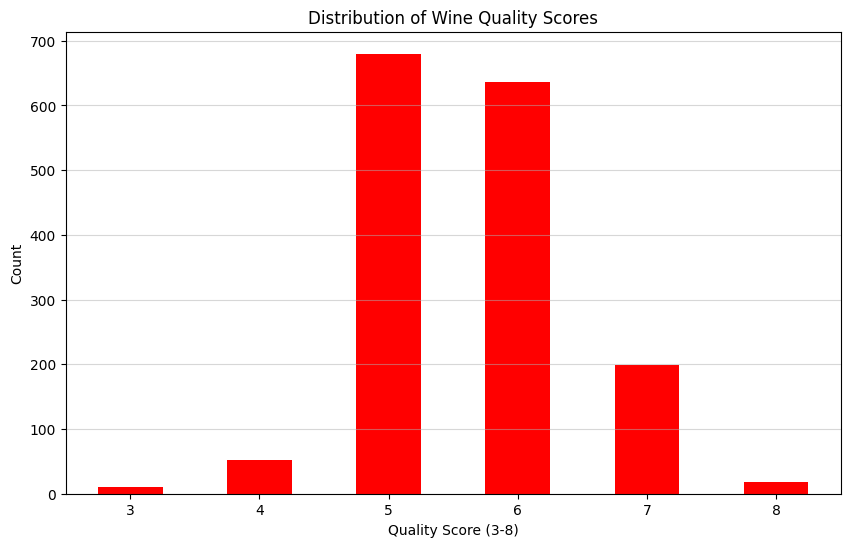

In [8]:
# Create a bar chart to visualize the distribution of wine quality.
plt.figure(figsize=(10, 6))
# A bar plot is suitable for visualizing counts of discrete categories (like quality scores 3-8).
data['quality'].value_counts().sort_index().plot(kind='bar', color='red') 
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score (3-8)')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.5) # Add grid for easier count reading
# Show the plot to visualize the class imbalance, which affects model training.
plt.show()

### Groups the original data by the 'quality' score and calculates the average alcohol content for each quality level. It then plots this relationship.	
This is a targeted piece of Exploratory Data Analysis (EDA). It tests a key hypothesis: does higher quality wine tend to have higher alcohol content? The resulting plot reveals this direct relationship.

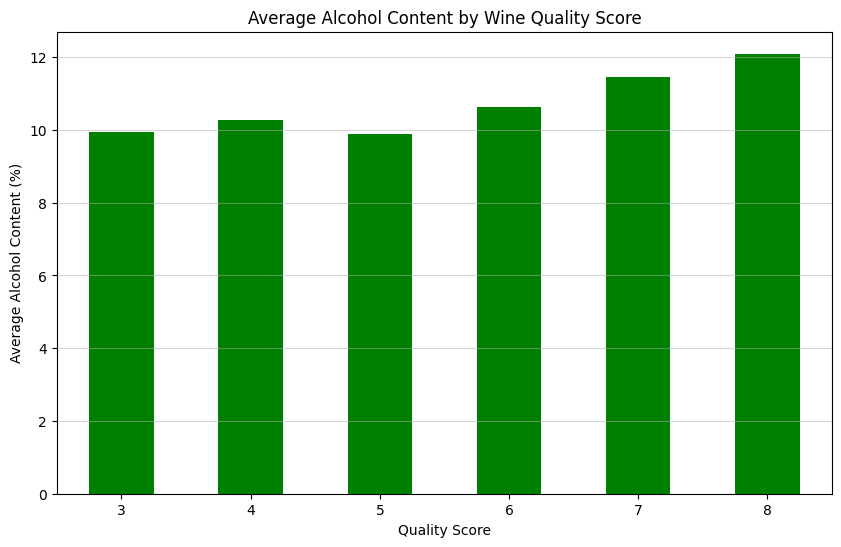

Average Alcohol Content by Quality Score:
 quality
3     9.955000
4    10.281731
5     9.892353
6    10.630665
7    11.465913
8    12.094444
Name: alcohol, dtype: float64


In [9]:
# Group the original data by quality and calculate the mean of alcohol for each group
alcohol_by_quality = data.groupby('quality')['alcohol'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
alcohol_by_quality.plot(kind='bar', color='green')
plt.title('Average Alcohol Content by Wine Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Average Alcohol Content (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Print the values
print("Average Alcohol Content by Quality Score:\n", alcohol_by_quality)
# Observation: Alcohol content clearly increases with wine quality, suggesting it is a strong predictor.

### Calculates the Pearson correlation matrix for all features and the target, then prints the correlations with the 'quality' column. A heatmap is generated for visualization.	
Correlation analysis quantifies the linear relationship between variables. High correlation with the target helps identify the most influential features. High correlation between features suggests multicollinearity, which can affect linear models (like Logistic Regression).

Pearson Correlation with Target 'Quality':
quality                 1.000000
alcohol                 0.480738
sulphates               0.270777
citric acid             0.233733
fixed acidity           0.127766
residual sugar          0.016464
free sulfur dioxide    -0.048641
pH                     -0.063373
chlorides              -0.119770
density                -0.173251
total sulfur dioxide   -0.185404
volatile acidity       -0.391735
Name: quality, dtype: float64


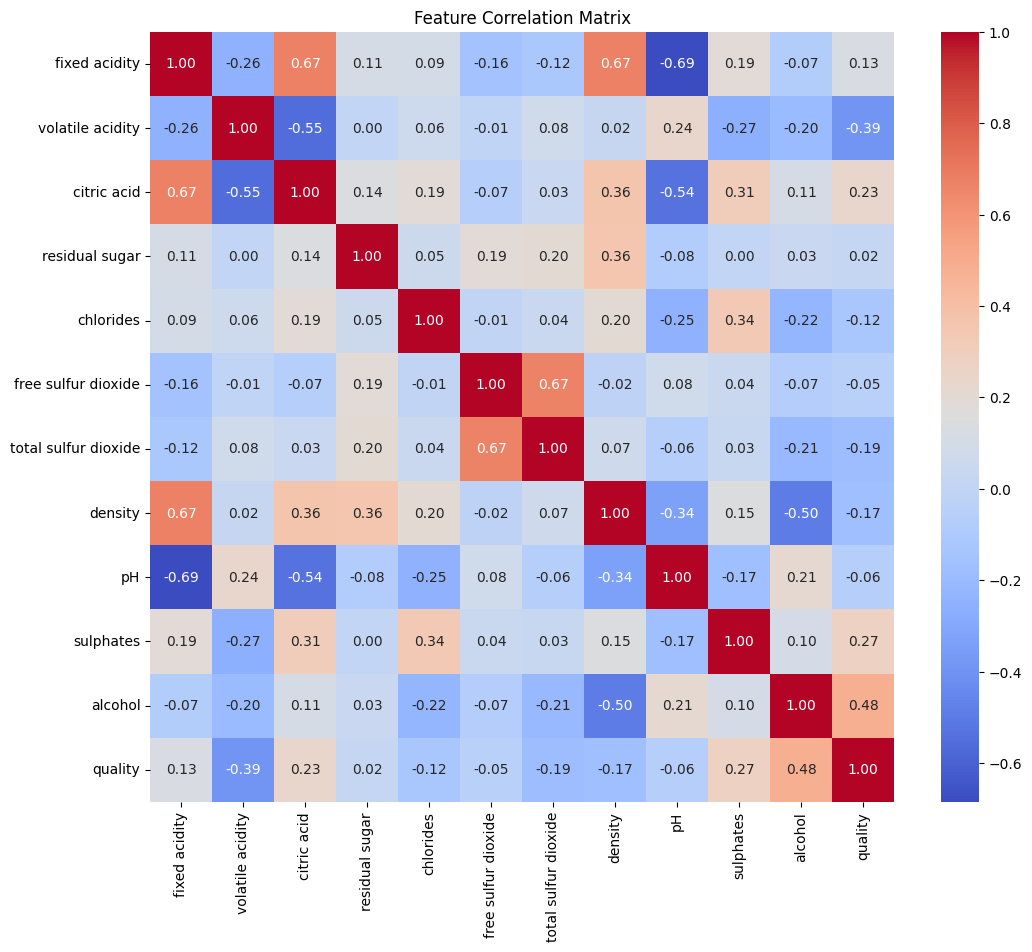

In [10]:
import seaborn as sns
# Calculate the Pearson correlation matrix for all columns
correlation_matrix = data.corr(method='pearson')

# Display the correlation of all features with the target variable 'quality'
print("Pearson Correlation with Target 'Quality':")
print(correlation_matrix['quality'].sort_values(ascending=False))

# Optional: Visualize the entire correlation matrix for feature redundancy/relationships
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

### Separates the data into features (X) and the target variable (y):	
This standardizes the data for model input. X contains the independent variables (wine properties), and y contains the dependent variable (quality).
### Creates a binary classification target (y_binary) where quality scores >6 are labeled as 1 (Good) and scores ≤6 are labeled as 0 (Bad):	
The original problem is multi-class ordinal classification (scores 3-8). Converting it to a simpler binary classification problem (Good vs. Bad) simplifies model training and interpretation.

In [11]:
# Separate features (X) from the target variable (y).
# 'quality' is the target variable we want to predict.
X = data.drop('quality', axis=1) 
y = data['quality']
# The quality score is an ordered category, but for simpler classification, we often convert it to binary (Good/Bad).
# Create a binary classification target: 1 if quality > 6, 0 otherwise.
y_binary = (y > 6).astype(int) 
y_binary.value_counts() # Check the new binary distribution

quality
0    1379
1     217
Name: count, dtype: int64

### Splits the features (X) and the binary target (y_binary) into training and testing sets, typically using an 80% train / 20% test ratio (test_size=0.2):
This is essential to evaluate model performance fairly. The model trains only on the training set and is tested on the unseen testing set. The stratify=y_binary argument ensures that both sets have the same proportion of Good and Bad wines.

In [12]:
# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# A 80/20 split is common practice (80% train, 20% test). stratify=y_binary ensures both sets have proportional representation of the binary target classes.
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
# Print shapes to verify the split was performed correctly and see the data dimensions.
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1276, 11)
X_test shape: (320, 11)


### Applies standardization using StandardScaler, which transforms the data such that it has a mean of 0 and a standard deviation of 1:
Scaling is critical for many ML algorithms (like SVM, Neural Networks, and K-Nearest Neighbors) that are sensitive to the magnitude and range of features. It ensures all features contribute equally to the distance calculation. It is fit only on the training data to prevent data leakage.

In [13]:
# Feature Scaling: Apply standardization to normalize the range of independent variables.
from sklearn.preprocessing import StandardScaler
# Scaling is crucial for distance-based and gradient-descent-based algorithms (like KNN, SVM, Neural Networks).
# Initialize the scaler.
scaler = StandardScaler()
# Fit the scaler only on the training data to prevent data leakage from the test set.
X_train_scaled = scaler.fit_transform(X_train)
# Transform both training and testing sets using the fitted scaler.
X_test_scaled = scaler.transform(X_test)
# The result is a NumPy array, ready for model training.

### Verifies the output of the StandardScaler performed by checking the mean and standard deviation of the transformed training data.	
The purpose of standardization is to center the data around zero and scale the variance to one. This cell provides empirical proof that the previous step was successful before models sensitive to scaling (like SVM and Neural Networks) are trained.

In [14]:
# Verification of Standardization performed in Cell 12
# We check the mean and standard deviation of the scaled data.

# Convert scaled arrays back to a DataFrame for easier viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Check the mean and standard deviation for the training data
print("Mean of Scaled Training Data (should be ~0):\n", X_train_scaled_df.mean().round(2))
print("\nStandard Deviation of Scaled Training Data (should be ~1):\n", X_train_scaled_df.std().round(2))
# The results confirm that standardization successfully centered the data around 0 with a unit variance of 1.

Mean of Scaled Training Data (should be ~0):
 fixed acidity          -0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide   -0.0
density                 0.0
pH                     -0.0
sulphates               0.0
alcohol                -0.0
dtype: float64

Standard Deviation of Scaled Training Data (should be ~1):
 fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64


### Trains a Logistic Regression model on the scaled data and evaluates its performance.	
Logistic Regression is a foundational linear model for binary classification. It serves as an important baseline to determine if more complex, non-linear models (like Random Forest) are truly necessary or provide a significant improvement over a simple, highly interpretable model.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Logistic Regression model. It requires scaled data.
model_lr = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model_lr.fit(X_train_scaled, y_train_binary)

# Predict and Evaluate
y_pred_lr = model_lr.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_lr))
print("\nAccuracy Score:", accuracy_score(y_test_binary, y_pred_lr))

Logistic Regression Results:
Confusion Matrix:
 [[272   4]
 [ 28  16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94       276
           1       0.80      0.36      0.50        44

    accuracy                           0.90       320
   macro avg       0.85      0.67      0.72       320
weighted avg       0.89      0.90      0.88       320


Accuracy Score: 0.9


### Trains an SGD Classifier using the log_loss function (which makes it behave like a linear classifier trained via SGD) on the scaled data and evaluates it.	
Stochastic Gradient Descent is an optimization algorithm used to train models quickly, especially on very large datasets. Including it in the comparison shows how an iterative, highly scalable model performs relative to standard batch models like Logistic Regression.

In [16]:
from sklearn.linear_model import SGDClassifier

# Initialize SGD Classifier. Loss='log_loss' makes it perform Logistic Regression using SGD optimization.
model_sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

# Train the model on the scaled training data
model_sgd.fit(X_train_scaled, y_train_binary)

# Predict and Evaluate
y_pred_sgd = model_sgd.predict(X_test_scaled)

print("Stochastic Gradient Descent (SGD) Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_sgd))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_sgd))
print("\nAccuracy Score:", accuracy_score(y_test_binary, y_pred_sgd))

Stochastic Gradient Descent (SGD) Classifier Results:
Confusion Matrix:
 [[243  33]
 [ 17  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       276
           1       0.45      0.61      0.52        44

    accuracy                           0.84       320
   macro avg       0.69      0.75      0.71       320
weighted avg       0.87      0.84      0.85       320


Accuracy Score: 0.84375


### Trains a Decision Tree Classifier on the unscaled data and evaluates it.	
Decision Trees are highly interpretable non-linear models. They are not sensitive to feature scaling, so we train on X_train (unscaled). This model serves as the foundational element for the more robust Random Forest (Cell 13), allowing us to compare the performance difference between a single tree and an ensemble of trees.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model. Decision Trees are generally not sensitive to feature scaling.
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model on the UNscaled training data
model_dt.fit(X_train, y_train_binary)

# Predict and Evaluate
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test_binary, y_pred_dt))

Decision Tree Classifier Results:
Confusion Matrix:
 [[256  20]
 [ 17  27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       276
           1       0.57      0.61      0.59        44

    accuracy                           0.88       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.89      0.88      0.89       320


Accuracy Score: 0.884375


### Trains a Random Forest Classifier on the scaled training data (X_train_scaled) and evaluates its performance on the test set. It prints the Confusion Matrix, Classification Report, and Accuracy Score:
Random Forest is an ensemble method known for its robustness and ability to handle complex, non-linear relationships without much hyperparameter tuning. The metrics provide a comprehensive view of how well the model predicts (accuracy, precision, recall, F1-score).

In [18]:
# Import the Random Forest Classifier, an ensemble method popular for its robustness.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Initialize the model. n_estimators=100 (number of trees) is a good starting point. random_state for reproducibility.
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model using the scaled training data.
model_rf.fit(X_train_scaled, y_train_binary)
# Make predictions on the scaled test data.
y_pred_rf = model_rf.predict(X_test_scaled)
# Evaluate the model's performance.
print("Random Forest Classifier Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test_binary, y_pred_rf))

Random Forest Classifier Results:
Confusion Matrix:
 [[273   3]
 [ 15  29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       276
           1       0.91      0.66      0.76        44

    accuracy                           0.94       320
   macro avg       0.93      0.82      0.87       320
weighted avg       0.94      0.94      0.94       320


Accuracy Score: 0.94375


### Trains a Support Vector Machine (SVC) with an RBF kernel and evaluates its performance using the same metrics as Cell 13.
SVMs are powerful classification models, particularly effective in high-dimensional spaces or when a clear margin of separation exists. Training a second model helps compare performance and ensure the results are not specific to a single model type.

In [19]:
# Import Support Vector Machine (SVM) Classifier, another powerful model, especially in high-dimensional spaces.
from sklearn.svm import SVC
# Initialize the model with a Radial Basis Function (RBF) kernel, which can capture non-linear relationships.
model_svm = SVC(kernel='rbf', random_state=42)
# Train the model. SVM performance is highly dependent on feature scaling (performed in Cell 12).
model_svm.fit(X_train_scaled, y_train_binary)
# Make predictions.
y_pred_svm = model_svm.predict(X_test_scaled)
# Evaluate the model.
print("Support Vector Machine (SVM) Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_svm))
print("\nAccuracy Score:", accuracy_score(y_test_binary, y_pred_svm))

Support Vector Machine (SVM) Results:
Confusion Matrix:
 [[272   4]
 [ 27  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       276
           1       0.81      0.39      0.52        44

    accuracy                           0.90       320
   macro avg       0.86      0.69      0.73       320
weighted avg       0.90      0.90      0.89       320


Accuracy Score: 0.903125


### Trains a scikit-learn based Multi-Layer Perceptron (MLPClassifier), which is a simple feedforward neural network, on the scaled data and evaluates it.	
This model is an alternative, scikit-learn specific implementation of a Neural Network, similar to the Keras model. It is included to provide a direct comparison of the performance of a shallow neural network against the other classification algorithms. Like the Keras model, it is highly sensitive to feature scaling.

In [20]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP Classifier (a basic feedforward neural network)
# hidden_layer_sizes=(8, 8) defines two hidden layers, each with 8 neurons.
model_mlp = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42, solver='adam')

# Train the model on the scaled training data (MLPs are scale-sensitive)
model_mlp.fit(X_train_scaled, y_train_binary)

# Predict and Evaluate
y_pred_mlp = model_mlp.predict(X_test_scaled)

print("Multi Layer Perceptron (MLPClassifier) Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test_binary, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_mlp))
print("\nAccuracy Score:", accuracy_score(y_test_binary, y_pred_mlp))

Multi Layer Perceptron (MLPClassifier) Results:
Confusion Matrix:
 [[267   9]
 [ 25  19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       276
           1       0.68      0.43      0.53        44

    accuracy                           0.89       320
   macro avg       0.80      0.70      0.73       320
weighted avg       0.88      0.89      0.88       320


Accuracy Score: 0.89375


### Extracts and visualizes the importance of each feature as calculated by the trained Random Forest model.	
Feature importance is a key aspect of model interpretability. It reveals which wine properties (e.g., alcohol, volatile acidity) the model relies on most heavily to predict quality, providing valuable insights to winemakers or domain experts.

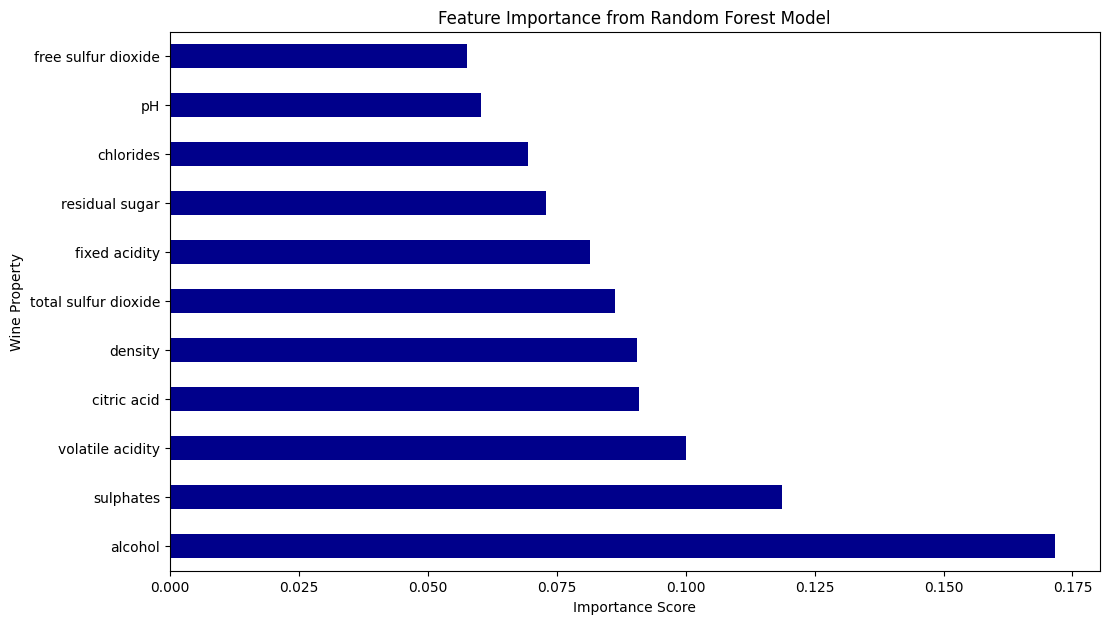

In [21]:
# Feature Importance: Crucial for understanding which input features drive the model's prediction.
# Applicable to tree-based models like Random Forest.
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
# Sort the features by importance in descending order.
feature_importances = feature_importances.sort_values(ascending=False)
# Create a bar plot to visualize the importance.
plt.figure(figsize=(12, 7))
# A bar plot is excellent for comparing relative magnitudes.
feature_importances.plot(kind='barh', color='darkblue') 
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Wine Property')
# Show the plot. This result guides domain experts and potential feature engineering.
plt.show()

### Builds, compiles, and trains a Sequential Deep Neural Network model using TensorFlow/Keras. The model has two hidden Dense layers with ReLU activation and a final output layer with Sigmoid activation (suitable for binary classification):	
A Neural Network represents a third, often more complex, modeling approach. Training it provides another benchmark for model comparison. The Keras syntax was updated here to use units and kernel_initializer instead of the deprecated arguments, ensuring the code runs without error.

In [ ]:
# IMPORTANT: This code assumes you have already run the steps to load,
# clean, scale, and split your data into X_train_scaled and y_train_binary.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf # Import TensorFlow for environment setup

# Build the Deep Neural Network (DNN) model
model = Sequential()
# Input Layer: 11 features (input_dim=11)
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=11))
# Hidden Layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
# Output Layer: 1 unit with sigmoid activation for binary classification (0 or 1)
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the updated verbose parameter
# verbose=2 prints only one line of summary per epoch (100 lines total),
# preventing the output truncation issue.
print("Starting Model Training...")
model.fit(
    X_train_scaled, 
    y_train_binary, 
    batch_size=10, 
    epochs=100,
    verbose=2  # <--- THIS IS THE FIX
)
print("Training Complete.")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8435 - loss: 0.6711
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3949
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3077
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.2821
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.2676
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.2759
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.2607
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.2693
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 0.2797
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.2607
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.2588
Epoch 12/100
128/128 ━━━━━━━━━━━━━━━━━━━━